# Exploratory Data Analysis on Haberman cancer survival Dataset :

# Objective

my objective is to determine which feature(s) ( Age of Patients,Year of operation,Positive auxiliary nodes) is/are more important to classify whether a patient will survived or not .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('haberman.csv',header=None,names=('age','year','nodes','status'))
df['status']=df['status'].replace({1:'survived',2:'not survived'})
df['status'].value_counts()

survived        225
not survived     81
Name: status, dtype: int64

Number of features is 3 (Age of patient,Year of operation,Positive auxiliary nodes).
Indipendent variable (Labels) contain two classes class_1(Survived) and class_2(Not survived).
class_1 contain 225 points and class_2 contain 81 datapoints.

# Exploratory data analysis

# 1.) Univariate data analysis

In [3]:
df.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Total number of datapoints in the Haberman dataset is 306.

Distribution plot or histogram,PDF on age of the patient

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


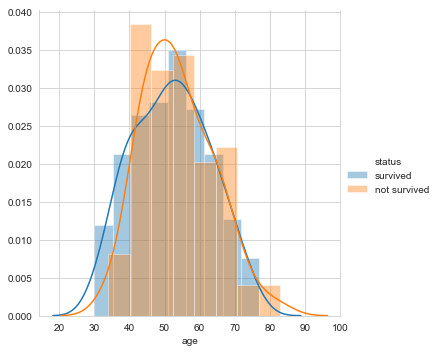

In [4]:
sns.FacetGrid(data=df,hue='status',size=5).map(sns.distplot,'age').add_legend()
plt.show()

Observations.

1. Patients whose age lies between [30,40] are more likely to survive.
2. Patients whose age lies between [41,59] are more likely to died.
3. PDF of age of patients who survived and did not survived is not well separated,so on the basis of feature (age) i can't distinguish survived status and not survived status.

Histogram and PDF of the year of operation

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


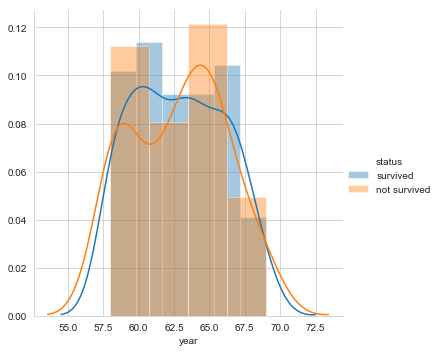

In [5]:
sns.FacetGrid(data=df,hue='status',size=5).map(sns.distplot,'year').add_legend()
plt.show()

Observations.

1. PDF of survived and not survived patients are heavely overlaped with each other.
2. Between 61 to 63 more patients are more likely to survived.
3. Between 63 to 66 more patients are died.

Due to very much amount of overlaping feature Year of operation will not be able to classify datapoints between survived status and not survived status.

Histogram,PDF on the positive auxiliary nodes of the patient

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[]

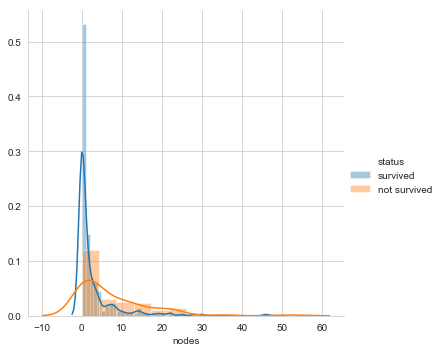

In [6]:
sns.FacetGrid(data=df,hue='status',size=5).map(sns.distplot,'nodes').add_legend()
plt.plot()

Observations.

1. The patients whose positive ausiliary nodes are about 0 are more likely to survived.
2. PDF of survived patients is much peacker at 0.


Patients having nodes less than 4 are more likely to survive , 
so i can say that auxiliary nodes is the feature which can separate these two classes with less than 100% accuracy.

PDF snd CDF of the patient on their age

In [7]:
counts,bin_edges=np.histogram(df['age'],density=True,bins=10)

In [8]:
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

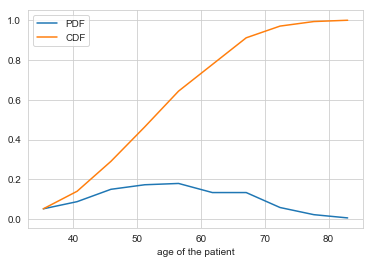

In [9]:
sns.set_style('whitegrid')
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.legend()
plt.xlabel('age of the patient')
plt.show()

Observations.

1. There are 90% patients whose age is less than equal to 70 year.
2. 67% ptients whose age is less than or equal to 60 year.
3. 60% patients whose age lies between 43 and 63.

PDF and CDF on year of operation

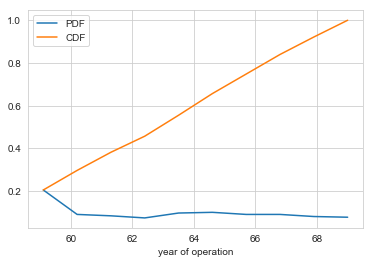

In [10]:
counts,bin_edges=np.histogram(df['year'],density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
sns.set_style('whitegrid')
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.xlabel('year of operation')
plt.legend()
plt.show()

Observations.

1. Almost 30% patients came to their treatment before 1960.
2. Maximum patients came to their treatment between 1963 to 1965.

PDF and CDf on positive auxiliary nodes of patient

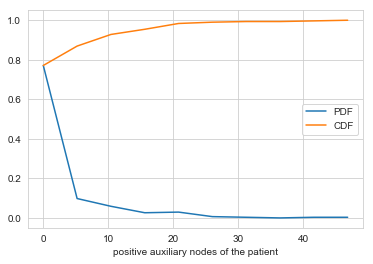

In [11]:
sns.set_style('whitegrid')
counts,bin_edges=np.histogram(df['nodes'],density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[:-1],pdf,label='PDF')
plt.plot(bin_edges[:-1],cdf,label='CDF')
plt.xlabel('positive auxiliary nodes of the patient')
plt.legend()
plt.show()


Observations.

1. peak of pdf is at 0.
2. Almost 89% patients having nodes are between 0 to 5.
3. Almost 8% patient having auxiliary nodes lies between 10 to 20.




# Mean,standard deviation,variance.

In [12]:
print('Mean of age , year and nodes.\n')
print(np.mean(df['age']))
print(np.mean(df['year']))
print(np.mean(df['nodes']))
print('\nstd-dev of age,year and nodes\n')
print(np.std(df['age']))
print(np.std(df['year']))
print(np.std(df['nodes']))
print('\nVariance of age , year and nodes \n')
print(np.var(df['age']))
print(np.var(df['year']))
print(np.var(df['nodes']))

Mean of age , year and nodes.

52.45751633986928
62.85294117647059
4.026143790849673

std-dev of age,year and nodes

10.78578520363183
3.244090833563246
7.177896092811152

Variance of age , year and nodes 

116.33316245888332
10.524125336409075
51.52219231919361


# Median,Percentile,Quantile,IQR,MAD

In [13]:
print('Median of age , year , nodes\n')
print(np.median(df['age']))
print(np.median(df['year']))
print(np.median(df['nodes']))
print('\n90th Percentile of age , year , nodes\n')
print(np.percentile(df['age'],90))
print(np.percentile(df['year'],90))
print(np.percentile(df['nodes'],90))
      

Median of age , year , nodes

52.0
63.0
1.0

90th Percentile of age , year , nodes

67.0
67.0
13.0


Mean of nodes is 4.0  but median is 1 ti means there may some outliers present in the nodes columns.
50 percentile of nodes if 1.0 and 90th percentile is 13.0 it means 40% values of nodes lies between 1 and 13.

In [56]:
print('\nQuantile of age , year , nodes\n ')
print(np.percentile(df['age'],np.arange(0,100,25)))
print(np.percentile(df['year'],np.arange(0,100,25)))
print(np.percentile(df['nodes'],np.arange(0,100,25)))
print('\nIQR of age , year , nodes\n')
print(np.percentile(df['age'],75)-np.percentile(df['age'],25))
print(np.percentile(df['year'],75)-np.percentile(df['year'],25))
print(np.percentile(df['nodes'],75)-np.percentile(df['nodes'],25))


Quantile of age , year , nodes
 
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]
[0. 0. 1. 4.]

IQR of age , year , nodes

16.75
5.75
4.0


50% patients having age lies between 44 to 60.
50% patients came to treatment between 1960 and 1965.
50% patients whose nodes value is <=1.

In [57]:
from statsmodels import robust
print('MAD of age , year , nodes\n')
print(robust.mad(df['age']))
print(robust.mad(df['year']))
print(robust.mad(df['nodes']))

MAD of age , year , nodes

11.860817748044816
4.447806655516806
1.482602218505602


std-dev. of nodes of nodes is 4.0 but MAD of nodes is 1.4 so this indicates presence of outliers.

Boxplot and violinplot of age of the patient

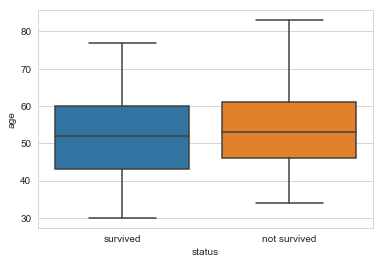

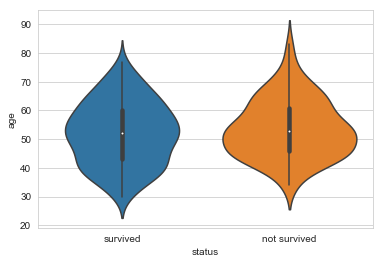

In [21]:
sns.set_style('whitegrid')
sns.boxplot(x='status',y='age',data=df)
plt.show()
sns.violinplot(x='status',y='age',data=df)
plt.show()

Median of the age of patients who survived is about 54 year and median of the age of patients who did not survived is about 55 or 56 year.
25 percentile of the age of patients who survived is 44 and 75 percentile is 60 year.
25 percentile of the age of patients who did not survived is 46 or 47 and 75 percentile is 62 year.

Boxplot and violinplot of year of operation of the patient

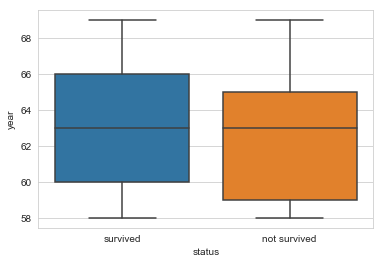

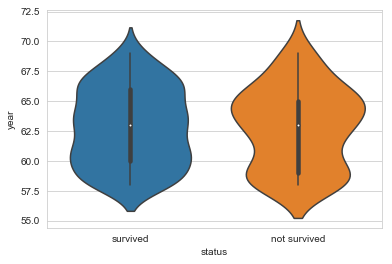

In [22]:
sns.set_style('whitegrid')
sns.boxplot(x='status',y='year',data=df)
plt.show()
sns.violinplot(data=df,x='status',y='year')
plt.show()

Boxplot and violinplot of the auxiliary positive nodes of the patient

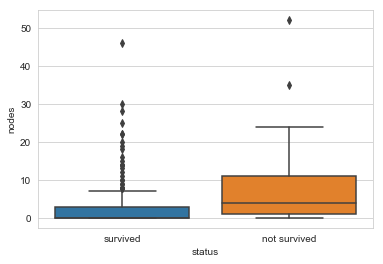

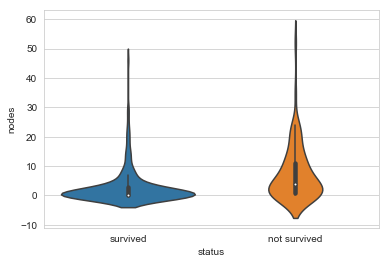

In [23]:
sns.set_style('whitegrid')
sns.boxplot(x='status',y='nodes',data=df)
plt.show()
sns.violinplot(x='status',y='nodes',data=df)
plt.show()

# 2.) Bivariate Analysis

Pairplot

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


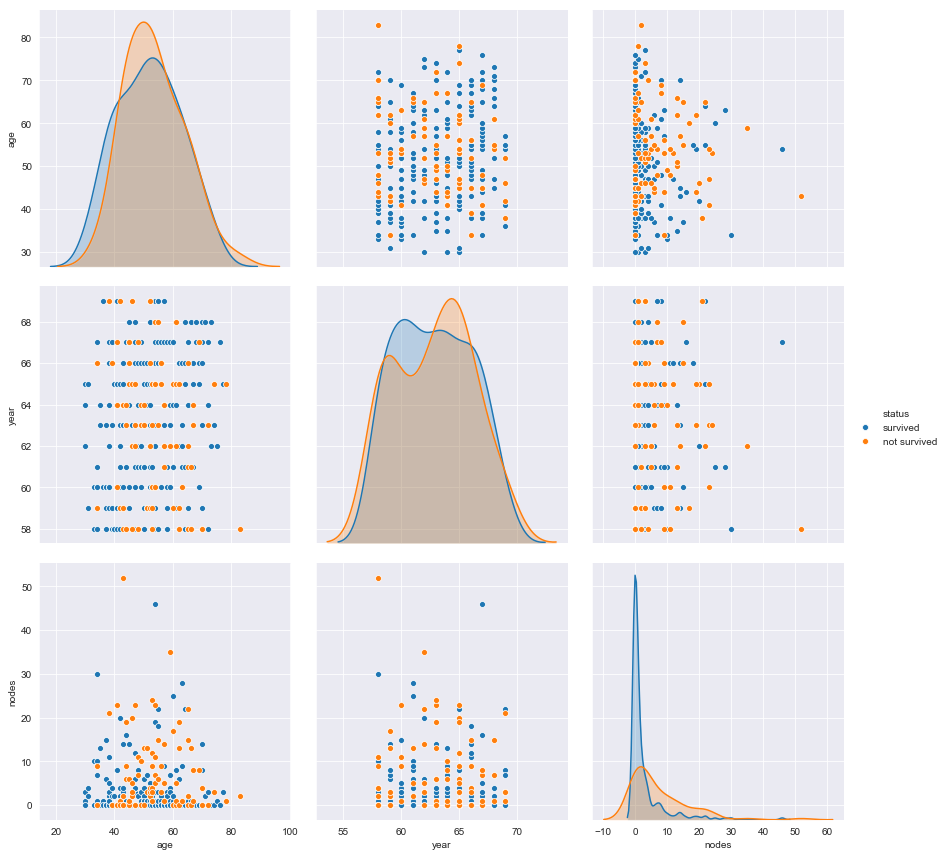

In [24]:
sns.set_style('darkgrid')
sns.pairplot(data=df,hue='status',size=4)
plt.show()

Observation.

From the pair plot i can say thet.
1. Scatter plot between (age,year) and (year,nodes) are very mess distribution and scatter plot between (age,nodes) shows that the patients whose age is between [30,60] and nodes [0,4) are more likely to survive.

# Scatter plot

Scatter plot between age of patient and year of operation.

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


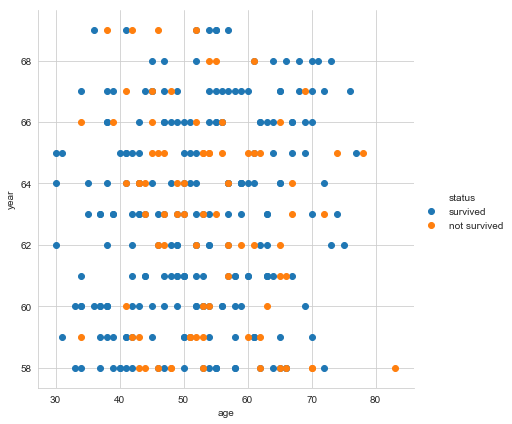

In [18]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,hue='status',size=6).map(plt.scatter,'age','year').add_legend()
plt.show()

Observation.

1. Patients whose age is between [30,40] and year of operation between [58,65] are survived except one patient.
2. Due to very mess distribution between (age,year) age and year features are not very useful featues towards classification.

Scatter plot between age of patient and positive auxiliary nodes

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


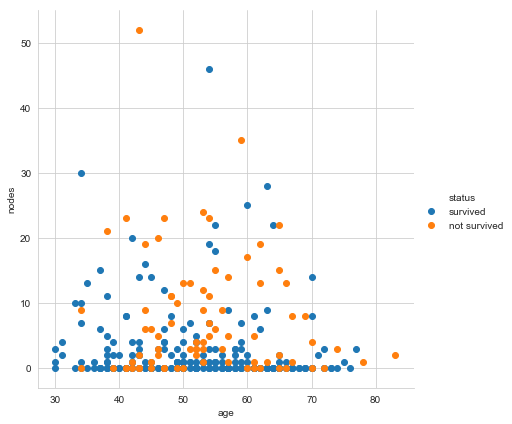

In [19]:
sns.FacetGrid(data=df,hue='status',size=6).map(plt.scatter,'age','nodes').add_legend()

Observation.

Patients whose age is between [30,60] and positive auxiliary nodes is between [0,4) are more likely to survive.
so i can say that age and nodes are feature which can classify class(survived) and class(not survived) with less accuracy.

Scatter plot between year of operation and positive auxiliary nodes of patients.

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


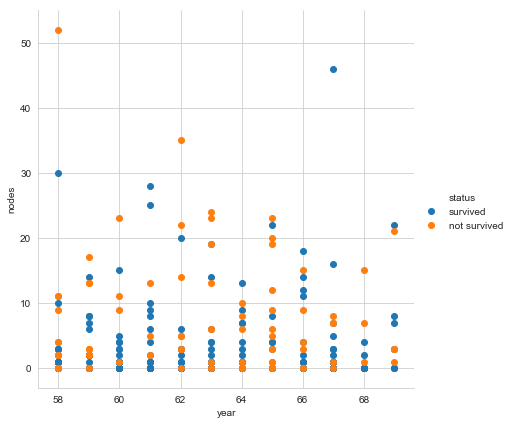

In [20]:
sns.FacetGrid(data=df,hue='status',size=6).map(plt.scatter,'year','nodes').add_legend()

Observation.

This scatter plot between (year,nodes) is very mess distribution and give no sense towards classification.

# Multivariate analysis

contour plot

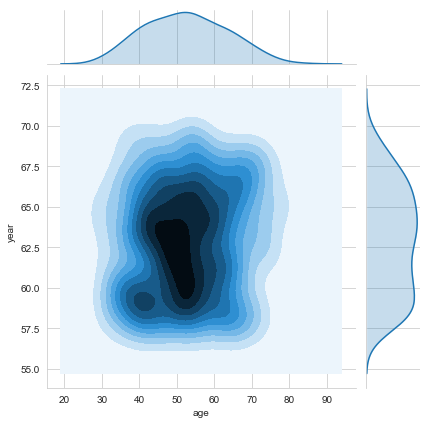

In [22]:
sns.set_style('whitegrid')
sns.jointplot(x='age',y='year',data=df,kind='kde')

Observation.

1. Maximum points having age between (45,55) and year (59,66) are present.

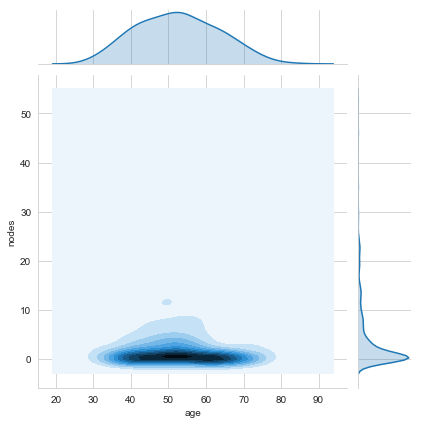

In [23]:
sns.jointplot(x='age',y='nodes',data=df,kind='kde')

Observation.

1. In the region of age (44,63) and nodes (0,1) maximum datapoints are present.

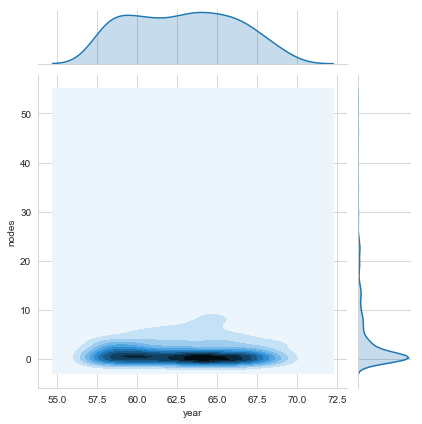

In [24]:
sns.jointplot(x='year',y='nodes',data=df,kind='kde')

Observation.

1. In the region of year (59,66) and nodes (0,1) Maximum datapoints are present.

# Summarizing plots

1. From all the above plots i concluded that number of positive auxiliary nodes is the most important feature towards classification of survived and not survived patients.